<a href="https://colab.research.google.com/github/vladimyr02/cd-Vladimyr-Gonzalez-2023/blob/main/Taller9ClaseCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Máquinas de Soporte Vectorial**

Las máquinas de soporte vectorial (SVM por sus siglas en inglés) son modelos de aprendizaje supervisado que pueden utilizarse para clasificar datos.

En el modelo SVM se construye un hiperplano en un espacio multidimensional para separar las diferentes clases. De forma iterativa se obtiene un hiperplano óptimo que minimice el error.

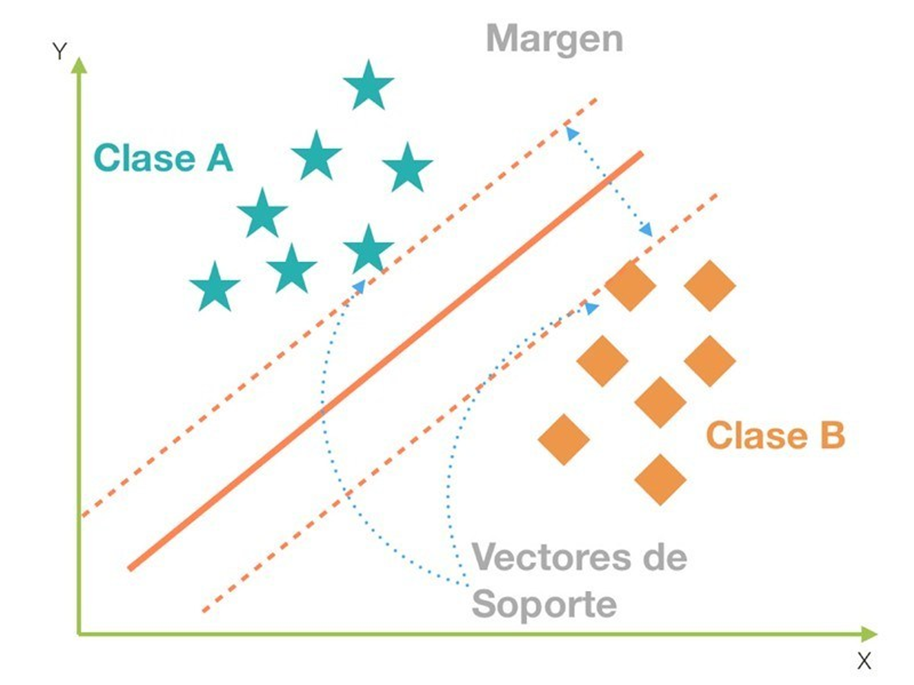

La misma idea se aplica a problemas de regresión:

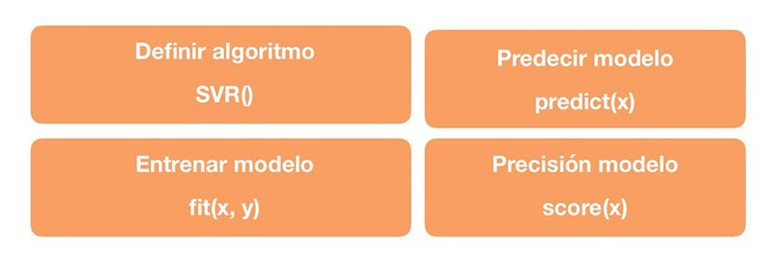

# **Modelo SVM**

**Funciones de Kernel:** lineal (*linear*), polinómica (*poly*), sigmoide (*sigmoid*), de base radial (*rbf*).

**Gamma:** Valor escalar que define que tanta influencia tiene un registro individual (punto).

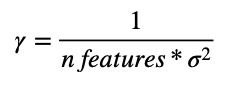

In [21]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Base de datos

Variable objetivo: Comprará

Variables explicativas:

Ingresos: Ingresos familiares mensuales

Gastos_ppal: Pagos de servicios públicos mensuales.

Gastos_transporte: Cuota de vehículos, los gastos en combustible, etc. al mes.

Otros_gastos: Compras en supermercado y lo necesario para vivir al mes.

ahorros: Total de ahorros disponibles para la compra de vivienda.

vivienda: Precio de la vivienda que se quiere comprar.

estado civil:
* 1: Soltero
* 2: Casado
* 3: Separado

hijos: Cantidad de hijos menores y/o que no trabajan.

trabajo:
* 0: sin empleo
* 1: independiente (freelance)
* 2: empleado
* 3: empresario
* 4: pareja: independiente
* 5: pareja: empleados
* 6: pareja: independiente y asalariado
* 7: pareja: empresario e independiente
* 8: pareja: empresarios los dos o empresario y empleado

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/fmoreno4/datasets/main/comprar_alquilar_con_cate.csv')
data

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,estado_civil,hijos,trabajo,comprara
0,6000,1000,0,600,50000,400000,Soltero,2,Tipo 2,Si
1,6745,944,123,429,43240,636897,Casado,3,Tipo 6,No
2,6455,1033,98,795,57463,321779,Separado,1,Tipo 8,Si
3,7098,1278,15,254,54506,660933,Soltero,0,Tipo 3,No
4,6167,863,223,520,41512,348932,Soltero,0,Tipo 3,Si
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,Soltero,0,Tipo 2,No
198,3961,1030,270,475,21880,280421,Separado,3,Tipo 8,No
199,3184,955,276,684,35565,388025,Casado,3,Tipo 8,No
200,3334,867,369,652,19985,376892,Casado,2,Tipo 5,No


In [23]:
data.isna().sum()

ingresos          0
gasto_ppal        0
vehiculo          0
otros_gastos      0
ahorros           0
Valor_vivienda    0
estado_civil      0
hijos             0
trabajo           0
comprara          0
dtype: int64

In [24]:
data2 = pd.get_dummies(data, columns=['estado_civil', 'trabajo'])
data2

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,hijos,comprara,estado_civil_Casado,estado_civil_Separado,estado_civil_Soltero,trabajo_Tipo 0,trabajo_Tipo 1,trabajo_Tipo 2,trabajo_Tipo 3,trabajo_Tipo 4,trabajo_Tipo 5,trabajo_Tipo 6,trabajo_Tipo 7,trabajo_Tipo 8
0,6000,1000,0,600,50000,400000,2,Si,0,0,1,0,0,1,0,0,0,0,0,0
1,6745,944,123,429,43240,636897,3,No,1,0,0,0,0,0,0,0,0,1,0,0
2,6455,1033,98,795,57463,321779,1,Si,0,1,0,0,0,0,0,0,0,0,0,1
3,7098,1278,15,254,54506,660933,0,No,0,0,1,0,0,0,1,0,0,0,0,0
4,6167,863,223,520,41512,348932,0,Si,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,No,0,0,1,0,0,1,0,0,0,0,0,0
198,3961,1030,270,475,21880,280421,3,No,0,1,0,0,0,0,0,0,0,0,0,1
199,3184,955,276,684,35565,388025,3,No,1,0,0,0,0,0,0,0,0,0,0,1
200,3334,867,369,652,19985,376892,2,No,1,0,0,0,0,0,0,0,1,0,0,0


In [25]:
data2 = data2.drop(['comprara'], axis=1)
data2

,ingresos,gasto_ppal,vehiculo,otros_gastos,ahorros,Valor_vivienda,hijos,estado_civil_Casado,estado_civil_Separado,estado_civil_Soltero,trabajo_Tipo 0,trabajo_Tipo 1,trabajo_Tipo 2,trabajo_Tipo 3,trabajo_Tipo 4,trabajo_Tipo 5,trabajo_Tipo 6,trabajo_Tipo 7,trabajo_Tipo 8
0,6000,1000,0,600,50000,400000,2,0,0,1,0,0,1,0,0,0,0,0,0
1,6745,944,123,429,43240,636897,3,1,0,0,0,0,0,0,0,0,1,0,0
2,6455,1033,98,795,57463,321779,1,0,1,0,0,0,0,0,0,0,0,0,1
3,7098,1278,15,254,54506,660933,0,0,0,1,0,0,0,1,0,0,0,0,0
4,6167,863,223,520,41512,348932,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,0,1,0,0,1,0,0,0,0,0,0
198,3961,1030,270,475,21880,280421,3,0,1,0,0,0,0,0,0,0,0,0,1
199,3184,955,276,684,35565,388025,3,1,0,0,0,0,0,0,0,0,0,0,1
200,3334,867,369,652,19985,376892,2,1,0,0,0,0,0,0,0,1,0,0,0


In [26]:
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(data2)
datos_escalados

array([[ 0.62012866,  0.10468863, -1.69895439, ..., -0.35845728,
        -0.3927922 , -0.4094265 ],
       [ 1.0639266 , -0.10162457, -0.71204191, ...,  2.78973273,
        -0.3927922 , -0.4094265 ],
       [ 0.89117304,  0.22626604, -0.91263388, ..., -0.35845728,
        -0.3927922 ,  2.44244084],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ..., -0.35845728,
        -0.3927922 ,  2.44244084],
       [-0.96801269, -0.38530521,  1.26178306, ..., -0.35845728,
        -0.3927922 , -0.4094265 ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -0.35845728,
        -0.3927922 , -0.4094265 ]])

In [27]:
#Selección de variables
pedictores = datos_escalados
objetivo = data.comprara

In [28]:
#Partición para validación cruzada
pred_train, pred_test, res_train, res_test = train_test_split(pedictores, objetivo, test_size=0.1)

In [29]:
#Modelo SVM
SVM_Model = SVC(gamma='auto', kernel='rbf')
SVM_Model.fit(pred_train, res_train)

SVC(gamma='auto')

In [30]:
print (f'Precisión: {SVM_Model.score(pred_test, res_test):.8f}')

Precisión: 0.85714286


In [38]:
from sklearn.metrics import recall_score
# Realiza las predicciones en el conjunto de prueba
predicciones = SVM_Model.predict(pred_test)

# Convierte las etiquetas en 0 y 1
res_test_binary = (res_test == 'Si').astype(int)
predicciones_binary = (predicciones == 'Si').astype(int)

# Calcula la exhaustividad del modelo
exhaustividad = recall_score(res_test_binary, predicciones_binary)

print(f'Exhaustividad: {exhaustividad:.8f}')


Exhaustividad: 0.72727273
